<a href="https://colab.research.google.com/github/tamtamxtamtam/NguyenThiMinhTam_18021113_Nhom5_DataUnderstandingAndVisualization/blob/master/Week4DataUnderstandingAndVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4: Data Understanding And Visualization**
# *(Hiểu và trực quan hóa dữ liệu)*

Nguyễn Thị Minh Tâm - Nhóm 5


---


Các thông tin được nêu trong báo cáo đều do em thu nhặt và tìm kiếm ở nhiều nguồn khác nhau, không tránh được khỏi sai sót (Thầy cô có thể để thêm nhận xét trực tiếp tại đây ạ (Ctrl+Alt+M)).


![](https://imgur.com/5lZwkjL.png)

Tiki là một trang thương mại điện tử lớn ở Việt Nam. Việc crawl dữ liệu tại đây cũng gặp nhiều khó khăn khi đa phần các trang thương mại điện tử đều có cơ chế hạn chế truy cập để tránh quá tải request. Ta có thể cải thiện bằng cách chia nhỏ danh sách các url của các trang sản phẩm, để một khoảng thời gian delay ở giữa; sử dụng hệ điều hành hỗ trợ đa luồng và cải thiện phần cứng máy được dùng để crawl.

---
# Tổng quan file sau khi thu thập:


*   Lấy mẫu khoảng 8000 sản phẩm trong 16 ngành hàng khác nhau (danh sách ngành hàng tại file 'product_type.txt').
*   Thời gian: ~ 200 sản phẩm/phút.
*   File tuần trước (có thay đổi): https://github.com/tamtamxtamtam/NguyenThiMinhTam_18021113_Nhom5_Crawler





# GET DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
tiki = pd.read_csv('/content/drive/My Drive/product.csv')

Lấy random 5 sản phẩm. 

Dữ liệu thu thập được gồm các trường:


1.   name: Tên sản phẩm
2.   sku: Mã sản phẩm
3.   no_of_stars: Số đánh giá sao trung bình của sản phẩm (0-5 sao)
4.   no_of_comments: Số lượng lượt đánh giá
5.   seller_name: Tên nhà cung cấp
6.   seller_link: Link cửa hàng nhà cung cấp
7.   img_link: Ảnh của sản phẩm
8.   price: Giá của sản phẩm sau khi đã chiết khấu (nếu có)
9.   original_price: Giá gốc chưa giảm của sản phẩm
10.   brief: Giới thiệu tóm tắt sản phẩm
11.   description: Thông số chi tiết sản phẩm
12.   info: Giới thiệu chi tiết sản phẩm



In [ ]:
tiki.sample(5)

,name,sku,no_of_stars,no_of_comments,seller_name,seller_link,img_link,price,original_price,brief,description,info
1051,Điều Hòa 2 Chiều LG Inverter 12000 Btu B13END ...,8.555008e+12,0.0,0,Tiki Trading,https://tiki.vn/cua-hang/tiki-trading,https://salt.tikicdn.com/cache/w390/ts/product...,10490000,13190000,Công suất lạnh:1.5 HP - 12.000 BTULoại máy: Đi...,Công suất làm lạnh1.5HPCông suất sưởi ấm12.800...,"Thiết kế thanh lịch, màn hình hiển thị nhiệt đ..."
1036,Giá Treo Màn Máy Tính Góc Xoay Đa Hướng Nhập K...,8.334905e+12,5.0,7,Công TyThiết Bị Hải Nam,https://tiki.vn/cua-hang/shop-hai-nam,https://salt.tikicdn.com/cache/w390/ts/product...,420000,625000,Kéo/ thả màn hình theo các hướng dễ dàngTiết k...,Thương hiệuNorth BayouXuất xứHong KongKích thư...,Sản phẩm giá treo LCD F120 được lắp đặt một c...
2422,Camera IP Wifi CareCam 3 Râu 1.0M HD 720P | Ti...,6.463679e+12,2.5,3,SIEUTHIHANGCONGNGHE,https://tiki.vn/cua-hang/sieuthihangcongnghe,https://salt.tikicdn.com/cache/w390/ts/product...,269000,359000,Cảm biến hình ảnh: HD 1.0M CMOSỐng kính: 3.6/2...,Thương hiệuOEMXuất xứ thương hiệuTrung QuốcSKU...,"1. Bấm dấu cộng góc phải màn hình, chọn dòng ..."
2453,Lens Sony SEL 50mm F1.8 | Tiki.vn,6.006983e+12,4.5,73,Tiki Trading,https://tiki.vn/cua-hang/tiki-trading,https://salt.tikicdn.com/cache/w390/ts/product...,4990000,5999000,Công nghệ ổn định hình ảnh SteadyShotKhẩu độ F...,Thương hiệuSonyXuất xứTrung QuốcSKU6005357664961,Lens Sony SEL 50mm F1.8Lens Sony SEL 50mm F1.8...
2768,Túi Đựng Máy Ảnh Canvas MC1 Size S - Hàng Nhập...,3.374925e+12,4.5,13,Túi Xách Thời Trang,https://tiki.vn/cua-hang/tui-xach-thoi-trang,https://salt.tikicdn.com/cache/w390/ts/product...,380000,475000,"Thiết kế thời trang, gọn nhẹTúi lót chống sock...",Thương hiệuCanvasXuất xứTrung QuốcKích thước28...,Giá sản phẩm trên Tiki đã bao gồm thuế theo lu...


In [ ]:
tiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            9095 non-null   object 
 1   sku             9091 non-null   float64
 2   no_of_stars     9095 non-null   float64
 3   no_of_comments  9095 non-null   int64  
 4   seller_name     9089 non-null   object 
 5   seller_link     9089 non-null   object 
 6   img_link        9095 non-null   object 
 7   price           9095 non-null   int64  
 8   original_price  9095 non-null   int64  
 9   brief           9092 non-null   object 
 10  description     9095 non-null   object 
 11  info            9090 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 852.8+ KB


# BASIC ANALYSIS

Khoảng giá của sản phẩm

In [ ]:
print('Giá sản phẩm trung bình: ', tiki['price'].mean())
print('Giá sản phẩm cao nhất: ',tiki['price'].max())
print('Giá sản phẩm thấp nhất: ', tiki['price'].min())

Giá sản phẩm trung bình:  1584338.0114348542
Giá sản phẩm cao nhất:  112950000
Giá sản phẩm thấp nhất:  0


In [ ]:
tiki[tiki['price'] == tiki['price'].max()]

,name,sku,no_of_stars,no_of_comments,seller_name,seller_link,img_link,price,original_price,brief,description,info,score
7726,Xe Máy Honda SH 150i Phanh ABS 2020 | Tiki.vn,5.672807e+12,5.0,2,Hệ thống HEAD Phát Tiến,https://tiki.vn/cua-hang/he-thong-head-phat-tien,https://salt.tikicdn.com/cache/w390/ts/product...,112950000,130000000,"Giá bán xe đã bao gồm thuế VAT, không bao gồm ...",Thương hiệuHondaXuất xứ thương hiệuNhật BảnXuấ...,Biểu trưng cho sự sang trọngHệ thống đèn cải t...,10.0


In [ ]:
pd_by_star = tiki.groupby('no_of_stars')
pd_by_star

Số lượng sản phẩm theo đánh giá

In [ ]:
tiki['no_of_stars'].value_counts()

4.5    5285
3.5    1239
0.0    1011
5.0     677
4.0     512
2.5     161
3.0     126
1.0      46
2.0      27
1.5      11
Name: no_of_stars, dtype: int64

Số sản phẩm của các nhà cung cấp

In [ ]:
tiki['seller_name'].value_counts()

Tiki Trading                   2236
Unica                           103
GUMAC                            89
Gia Khang                        78
Văn hóa Phương Đông              73
                               ... 
SHOP MỸ LAN                       1
Chuyên Đồ Câu                     1
cominga                           1
Chuyên thời trang nam nữ CD       1
BeMine Store                      1
Name: seller_name, Length: 2041, dtype: int64

Do Tiki không hiển thị số lượng hàng bán được, nên ta coi số đánh giá tương đương với số sản phẩm đã bán. Đặt cho các sản phẩm 1 điểm số tương đương với tích của số sao và số đánh giá.

In [4]:
tiki['score'] = tiki['no_of_comments'] * tiki['no_of_stars']
tiki_a = tiki[['name', 'sku', 'no_of_stars', 'no_of_comments', 'score', 'price', 'original_price', 'seller_name']]
tiki_a.sample(5)

,name,sku,no_of_stars,no_of_comments,score,price,original_price,seller_name
8412,Khóa học Tiếng Hàn Sơ Cấp 1 (Giáo Trình Tiếng ...,5.270464e+12,0.0,0,0.0,650000,1200000,Học Online cùng Tomato
6746,Combo 100 Dây Chun Cột Buộc Tóc Trơn Nhiều Màu...,2.388934e+12,3.5,32,112.0,21900,200000,Bảo Bảo Store
369,Điện Thoại ZIP 2.4-1 - Hàng Chính Hãng | Tiki.vn,7.772629e+12,3.5,8,28.0,270000,390000,Vinky Shop
4367,Bánh gấu chùm ngây (nhân kem) Morice - Thơm ng...,3.135168e+12,4.5,81,364.5,29000,36000,GUfoods
7265,Giày Thể Thao Nam Biti's Hunter Street DSMH013...,8.925790e+12,4.5,55,247.5,475000,499000,Tiki Trading


Nhóm các sản phẩm theo giá tiền (bước giá 1.000.000)

In [7]:
tiki_b = tiki.groupby(pd.cut(tiki["price"], np.arange(0, tiki['price'].max(), 1000000)))
tiki_b[['score', 'price', 'original_price']].sum().head(5)


,score,price,original_price
price,,,
"(0, 1000000]",1965338.0,1713868158,2936536702
"(1000000, 2000000]",72711.0,614314069,930213700
"(2000000, 3000000]",34550.5,590047288,823388000
"(3000000, 4000000]",19104.0,502585000,718899500
"(4000000, 5000000]",7835.0,551131900,772672000


**Làm sạch dữ liệu:** Lọc bỏ các khoảng giá tiền không có sản phẩm nào

In [8]:
tiki_d = tiki_b.size().reset_index(name='counts')
tiki_d[tiki_d['counts'] != 0]

,price,counts
0,"(0, 1000000]",7467
1,"(1000000, 2000000]",423
2,"(2000000, 3000000]",233
3,"(3000000, 4000000]",142
4,"(4000000, 5000000]",121
5,"(5000000, 6000000]",85
6,"(6000000, 7000000]",70
7,"(7000000, 8000000]",63
8,"(8000000, 9000000]",62
9,"(9000000, 10000000]",64


Ta có một bảng với các giá trị hữu dụng (sử dụng giá trị kích thước của các trường dạng string)

In [ ]:
tiki_c = tiki[['name','no_of_stars', 'no_of_comments', 'score','price', 'original_price']]
tiki_c['s_brief'] = tiki['brief'].str.len()
tiki_c['s_description'] = tiki['description'].str.len()
tiki_c['s_info'] = tiki['info'].str.len()
tiki_c.head(5)

,name,no_of_stars,no_of_comments,score,price,original_price,s_brief,s_description,s_info
0,Điện Thoại iPhone 7 Plus 128GB - Hàng Chính Hã...,4.5,118,531.0,9490000,13990000,246.0,735,3320.0
1,Điện Thoại iPhone 11 128GB - Hàng Chính Hãng ...,4.5,90,405.0,19990000,23990000,392.0,948,6723.0
2,iPad Mini 5 Wi-Fi 64GB - Hàng Nhập Khẩu Chính...,4.5,324,1458.0,9790000,11990000,241.0,690,3516.0
3,Điện Thoại iPhone 11 Pro Max 64GB - Hàng Chính...,4.5,133,598.5,27990000,33990000,316.0,969,4680.0
4,Điện Thoại Vsmart Active 3 - Hàng Chính Hãng |...,4.5,533,2398.5,2850000,4490000,371.0,1329,2741.0


# DATA VISUALIZATION

Biểu đồ thể hiện mối tương quan giữa điểm số của sản phẩm và giá tiền


*   Có xu hướng các sản phẩm giá rẻ được ưa chuộng
*   Dễ dàng nhận thấy các điểm bất thường



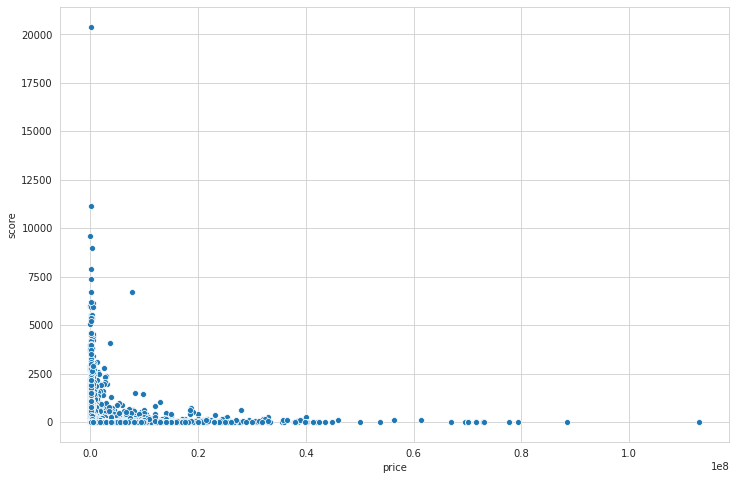

In [ ]:
sns.scatterplot(x="price", y="score", data=tiki_c)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Thể hiện những sản phẩm dưới 5.000.000:

=> Những sản phẩm giá thành càng ít, số lượng càng nhiều

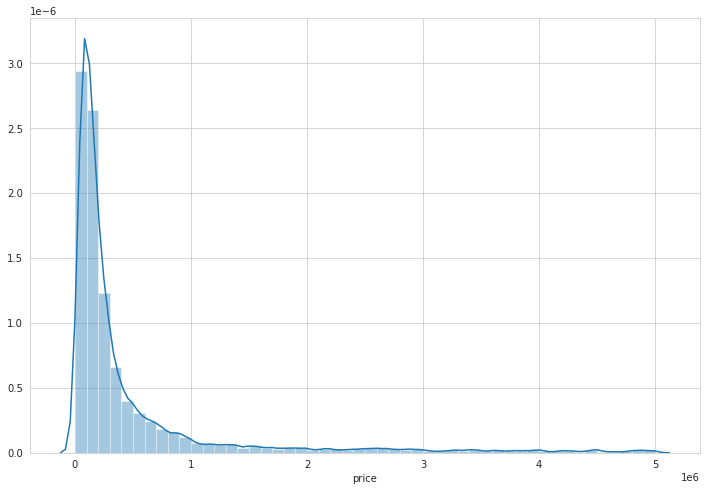

In [ ]:
sns.distplot(tiki[tiki['price'] < 5000000]['price']) 
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Top 15 nhà bán hàng có số lượng sản phẩm nhiều nhất (ngoại trừ Tiki Trading)

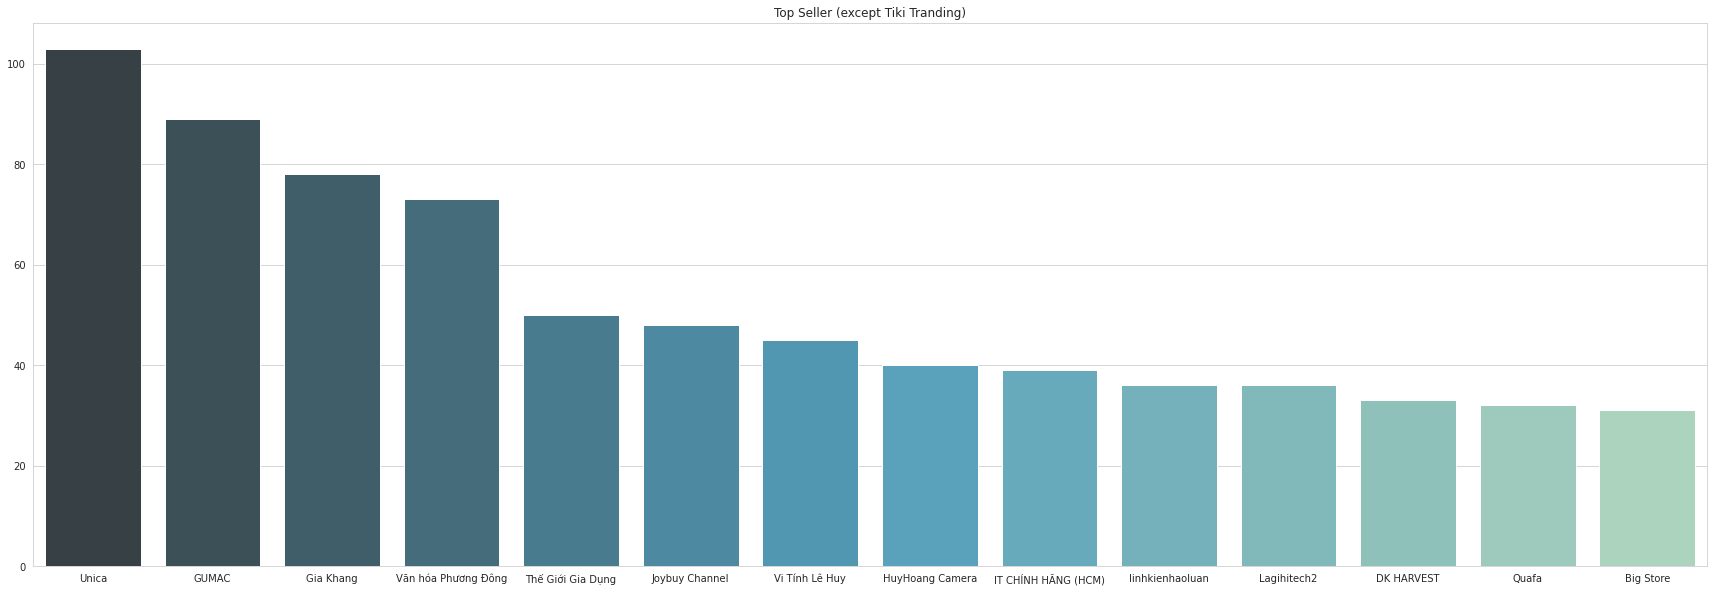

In [ ]:
plt.subplots(figsize=(30,10))
sns.barplot(tiki['seller_name'].value_counts()[1:16].index,tiki['seller_name'].value_counts()[1:16].values,palette='GnBu_d')
plt.title('Top Seller (except Tiki Tranding)')
plt.show()

Số lượng sản phẩm theo điểm sao đánh giá

*   Đánh giá: Sản phẩm trên Tiki có chất lượng cao



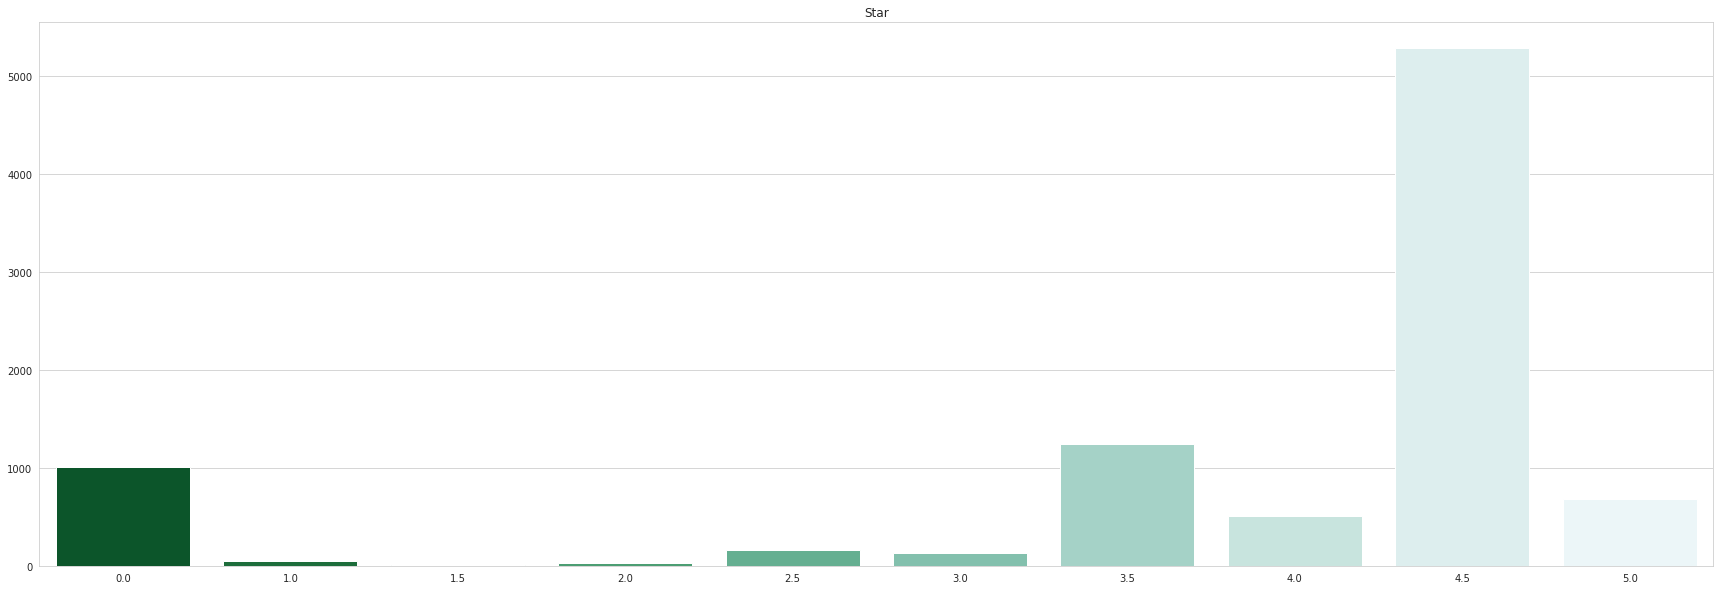

In [ ]:
plt.subplots(figsize=(30,10))
sns.barplot(tiki['no_of_stars'].value_counts().index,tiki['no_of_stars'].value_counts().values,palette='BuGn_r')
plt.title('Star')
plt.show()

Tương quan giữa giá tiền trước và sau khi giảm

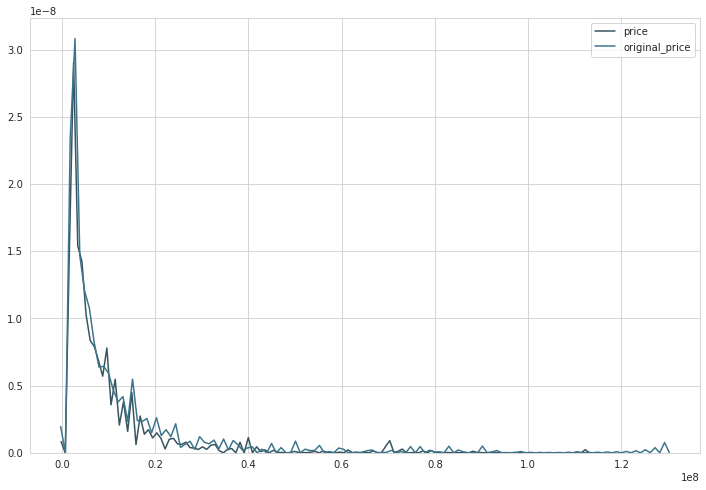

In [ ]:
sns.kdeplot(tiki['price'])
sns.kdeplot(tiki['original_price'])
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.set_palette('Blues') 
plt.legend();

Tương quan giữa giá và độ dài của phần giới thiệu

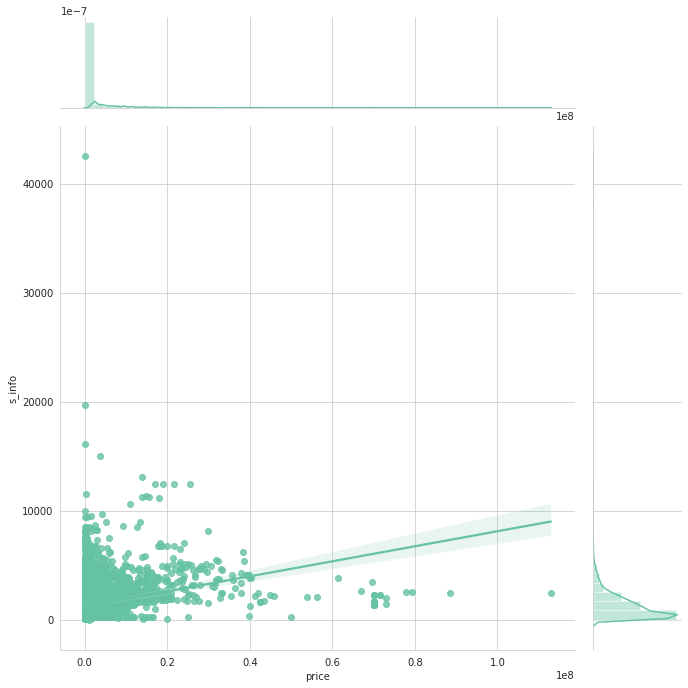

In [ ]:
g = sns.JointGrid(x="price", y="s_info", data=tiki_c)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.set_palette('Blues') 
g = g.plot(sns.regplot, sns.distplot)